<a href="https://colab.research.google.com/github/Shubham999-code/Mobile-Price-Range-Prediction./blob/main/Individual_Capstone_Project_Colab__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** :- Mobile Price Range Prediction.

**Project Type** :- Classification.

**Contribution** :- Team(Data Pirates)

**Team Member 1 :-Tabassum Patel (Team Leader)**

**Team Member 2 :-Shubham Kodape**

**Team Member 3 :-Asma Patel**

**Team Member 4 :-anuja Ghotekar**

**Team Member 5 :-Pratiksha Auti** 

# **Project Summary :-**

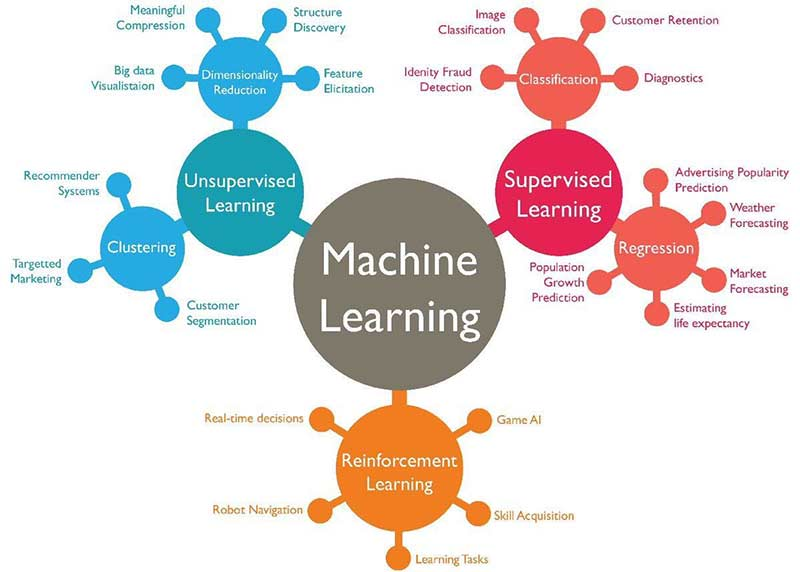

Now a days, a cellphone is an essential accessory of a person. It is the fastest evolving and moving product in the technology market space. New mobiles with updated versions and new features are introduced into the market at a rapid pace. Thousands of mobiles are sold each day. In such a fast-paced and volatile market, a mobile company needs to set optimal prices to complete with its rivals.This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer.Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market.During the purchase of mobile phones, various features like memory, display, battery, camera, etc., are considered. People fail to make correct decisions, due to the non-availability of necessary resources to cross-validate the price. To address this issue, a machine learning model is developed using the data related to the key features of the mobile phone. The developed model is then used to predict the price range of the new mobile phone.use the machine learning algorithms namely Support Vector Machine (SVM), Random Forest Classifier (RFC), Logistic Regression,Decission Tree,Naive Bayes Theorm,K-nearest neighbors are used to train the model and predict the output as low, medium, high or very high of price range.

# **GitHub Link :-**

https://github.com/Shubham999-code

# **Problem Statement :-**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phoneleg - RAM Internal Memory, etc) and its selling price in this problem, we do not have to predict the actual price but a price range indicating how high the price is ?

AIM :- In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile.

# **Let's Begin ! :-**

# **1. Know Your Data :-**

First of all, import all required libraries like pandas, matplotlib, etc. These libraries are used to load, preprocess and visualize the dataset.

Then load the training and testing dataset using the read_csv function of the pandas module and store into the separate variable train and test.

# **Import Libraries :-**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# **Dataset Loading :-**

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/data_mobile_price_range.csv',encoding='unicode_escape')

# **Dataset First View :-**

In [4]:
# Dataset First Look
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Dataset Rows & Columns count :-**

In [5]:
# Dataset Rows & Columns count
df1.shape

(2000, 21)

# **Dataset Information :-**

In [6]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Duplicate Values :-**

In [7]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

# **Missing Values/Null Values :-**

In [8]:
# Missing Values/Null Values Count
print(df1.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


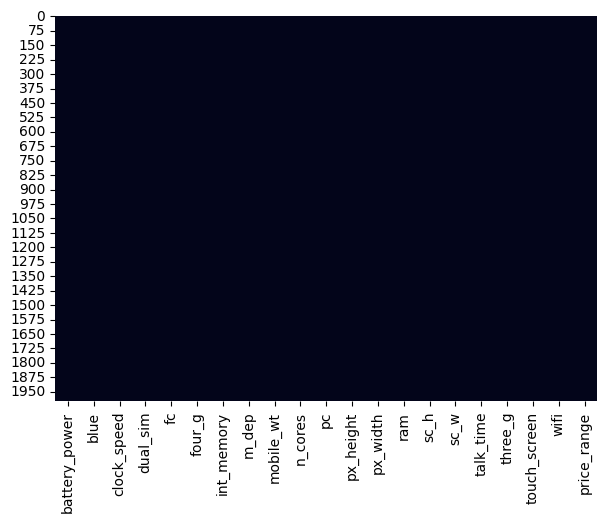

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()
     

# **What did you know about your dataset?**

answer :- 1.The given dataset from competitive mobile market companies, and we do not have to predict the actual price but a price range indicating how high the price is.

2.Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

3.The above dataset has 2000 rows and 21 columns. There are no mising values and duplicate values in the dataset.

# **2. Understanding Your Variables :-**

In [10]:
# Dataset Columns
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
df1.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
# Total phones with sc_w = 0
print(len(df1[df1.sc_w == 0]))
# Total phones with px_height = 0
print(len(df1[df1.px_height == 0]))

180
2


In [13]:
#where ther is sc_W and px_height is zero ,assigning mean values
df1['sc_w'][df1[df1.sc_w == 0].index] = df1.sc_w.mean()
df1['px_height'][df1[df1.px_height == 0].index] = df1.px_height.mean()

In [14]:
#checking whether there is duplicates or not
len(df1[df1.duplicated()])

0

In [15]:
#The nunique () method returns the number of unique values for each column
df1.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

**there are no duplicate values.**

In [16]:
#checking whether there is null values or not
df1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**there are no missing values in the data set.**

# **Variables Description :-**





*   Battery_power : Total energy a battery can store in one time measured in mAh

*   Blue : Has bluetooth or not
*   Clock_speed : speed at which microprocessor executes instructions
*   Dual_sim : Has dual sim support or not
*   Fc : Front Camera mega pixels
*   Four_g : Has 4G or not
*   Int_memory : Internal Memory in Gigabytes
*   M_dep : Mobile Depth in cm
*   Mobile_wt : Weight of mobile phone
*   N_cores : Number of cores of processor
*   Pc : Primary Camera mega pixels
*   Px_height : Pixel Resolution Height
*   Px_width : Pixel Resolution Width
*   Ram : Random Access Memory in Mega
*   Touch_screen : Has touch screen or not
*   Wifi : Has wifi or not
*   Sc_h : Screen Height of mobile in cm
*   Sc_w : Screen Width of mobile in cm
*   Talk_time : longest time that a single battery charge will last when you are
*   Three_g : Has 3G or not
*   Wifi : Has wifi or not
*   Price_range : This is the target variable with value of 0(low cost),      (medium cost),2(high cost) and 3(very high cost).

# **Check Unique Values for each variable. :-**

In [17]:
# Check Unique Values for each variable.
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


# **Now start wih Machine Learning algorithim :-**

In [18]:
#importing all libraries
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_auc_score,accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.6/567.6 kB 10.0 MB/s eta 0:00:00


# **Feature Selection with hypothesis test :-**

Chi-test: It is help to figure-out relation between features and label with "pvalue <= 0.1"

In [19]:
ct = pd.crosstab(df1['wifi'],df1['price_range'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.1:
    print("Alternate Hypothesis passed. int_memory and price_range have Relationship")
else:
    print("Null hypothesis passed. int_memory and price_range doesnot have  Relationship")

pvalue :  0.8359905195342198
Null hypothesis passed. int_memory and price_range doesnot have  Relationship


In [20]:
#  defining new variable for pixels
data_num = df1[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

df1['pixels'] = data_num['px_height']*data_num['px_width']
# Dropping px_height and px_width

df1.drop(['px_height', 'px_width'],axis=1,inplace=True)

In [21]:
# Defining X and y
x = df1.drop(['price_range'], axis = 1).values
y = df1['price_range'].values

In [22]:
x.shape

(2000, 19)

In [23]:
y.shape

(2000,)

In [24]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# **ML Model Implementation :-**

here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1.support vector classification

2.DecisionTreeClassifier

3.RandomForestClassifier

4.XGB boostclassifier

# **spliting training and testing data :-**

In [25]:
#separate the dataset in two type one trainingis 75% of data and other testing is 25% of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state=167)
print(x_train.shape)
print(x_test.shape)

(1500, 19)
(500, 19)


# **ML Model 4 - implementing support vector machine classifier :-**

In [26]:
#applying support vector machine classifier
svcmodel = SVC(probability=True)  
svcmodel.fit(x_train, y_train)

SVC(probability=True)

In [27]:
trainscore =  svcmodel.score(x_train,y_train)
testscore =  svcmodel.score(x_test,y_test)  

print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
y_predsvc =  svcmodel.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predsvc,average='micro'),'\n')
print(confusion_matrix(y_test, y_predsvc))

train score: 0.954 

test score: 0.844  

 f1 score:  0.844 

[[114  18   0   0]
 [  8  92   9   0]
 [  0  12  97  10]
 [  0   0  21 119]]


In [28]:
print(' precision score: ',precision_score(y_test, y_predsvc,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predsvc,average='micro'),'\n')
print(classification_report(y_test, y_predsvc))

 precision score:  0.844 

 recall score:  0.844 

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       132
           1       0.75      0.84      0.80       109
           2       0.76      0.82      0.79       119
           3       0.92      0.85      0.88       140

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.85      0.84      0.85       500



In [29]:
#-------------------------------------- support vector classification -------------------------------------
probabilityValues = svcmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)
     

0.9932946666666667


**finally we made result in support vector machine!!**

# 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer :-

1.we used support vector machine to create the model. As we got not so good result.

2.For training score is 95% and testing score 83%

3.For testing dataset, i found precision of 83% and recall of 83% and f1-score of 83% . BUt, we also interested to see the result for mobile price range result as

a.we got low(0) price precision 96% of and recall of 83% and f1-score of 89%.

b.we got medium(1) price precision 73% of and recall of 81% and f1-score of 77%.

c.we got High(2) price precision 74% of and recall of 81% and f1-score of 77%.

d.we got very high(3) price precision 92% of and recall of 85% and f1-score of 88%.

# **ML Model 5 - implementing Decision Tree :-**

In [30]:
#Applying Decision Tree
DTmodel=  DecisionTreeClassifier(max_depth=6)  
DTmodel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [31]:
trainscore =  DTmodel.score(x_train,y_train)
testscore =  DTmodel.score(x_test,y_test)
y_predDT =  DTmodel.predict(x_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' f1 score: ',f1_score(y_test, y_predDT,average='micro'),'\n')
print(confusion_matrix(y_test, y_predDT))

train score: 0.93 

test score: 0.854  

 f1 score:  0.854 

[[115  17   0   0]
 [  1  95  13   0]
 [  0  15  91  13]
 [  0   0  14 126]]


In [32]:
print(' precision score: ',precision_score(y_test, y_predDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predDT,average='micro'),'\n')
print(classification_report(y_test, y_predDT))

 precision score:  0.854 

 recall score:  0.854 

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       132
           1       0.75      0.87      0.81       109
           2       0.77      0.76      0.77       119
           3       0.91      0.90      0.90       140

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.85      0.86       500



In [33]:
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)
     

0.9779121666666667


**finally we made result in Decision Tree!!**

# Which Evaluation metrics did you consider for a positive business impact and why?

answer : -

1.we used Decision Tree to create the model. As we got not so good result.

2.For training score is 93% and testing score 85%

3.For testing dataset, i found precision of 85% and recall of 85% and f1-score of 85% . BUt, we also interested to see the result for mobile price range result as

a.we got low(0) price precision 99% of and recall of 86% and f1-score of 92%.

b.we got medium(1) price precision 74% of and recall of 87% and f1-score of 80%.

c.we got High(2) price precision 79% of and recall of 77% and f1-score of 78%.

d.we got very high(3) price precision 91% of and recall of 91% and f1-score of 91%.

In [34]:
# Cross validation
from sklearn.model_selection import GridSearchCV
gridDT = GridSearchCV(DTmodel, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
gridDT.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.777 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.783 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.837 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.783 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.813 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [35]:
#find best params value
gridDT.best_params_

{'max_depth': 5, 'max_leaf_nodes': 100}

In [36]:
#find best estimeter
gridDT.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100)

In [37]:
DTgmodel=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100)
DTgmodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100)

In [38]:
# Predict on the model
# Get the predicted probabilities
trainscore =  DTgmodel.score(x_train,y_train)
testscore =  DTgmodel.score(x_test,y_test) 
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predgDT = DTgmodel.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predgDT,average='micro'),'\n')

# Get the confusion matrix for both train and test
print(confusion_matrix(y_test, y_predgDT))

train score: 0.8913333333333333 

test score: 0.848 

 f1 score:  0.848 

[[114  18   0   0]
 [  2  98   9   0]
 [  0  17  85  17]
 [  0   0  13 127]]


In [39]:
# Prediction
y_pred_test = DTgmodel.predict(x_test)
y_pres_train = DTgmodel.predict(x_train)

# Evaluation metrics for test
print(' precision score: ',precision_score(y_test, y_predgDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predgDT,average='micro'),'\n')
print(classification_report(y_test, y_pred_test))

 precision score:  0.848 

 recall score:  0.848 

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       132
           1       0.74      0.90      0.81       109
           2       0.79      0.71      0.75       119
           3       0.88      0.91      0.89       140

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.84       500
weighted avg       0.86      0.85      0.85       500



In [40]:
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9779121666666667


# Which hyperparameter optimization technique have you used and why?

answer :-

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why we have used GridsearCV method for hyperparameter optimization.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training score is 89% and testing score 84%.

For testing dataset,

a.we got low(0) price precision 98% of and recall of 86% and f1-score of 92%.

b.we got medium(1) price precision 74% of and recall of 90% and f1-score of 81%.

c.we got High(2) price precision 79% of and recall of 71% and f1-score of 75%.

d.we got very high(3) price precision 88% of and recall of 91% and f1-score of 89%.

# **ML Model 6 - implementing Random forest classifier :-**

In [41]:
#applying random forest classifier
RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=9) 
RFmodel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [42]:
trainscore =  RFmodel.score(x_train,y_train)
testscore =  RFmodel.score(x_test,y_test)  
y_predRF =  RFmodel.predict(x_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' f1 score: ',f1_score(y_test, y_predRF,average='micro'),'\n')
print(confusion_matrix(y_test, y_predRF))

train score: 0.9993333333333333 

test score: 0.864  

 f1 score:  0.864 

[[121  11   0   0]
 [  4  95  10   0]
 [  0  16  87  16]
 [  0   0  11 129]]


In [43]:
print(' precision score: ',precision_score(y_test, y_predRF,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predRF,average='micro'),'\n')
print(classification_report(y_test, y_predRF))

 precision score:  0.864 

 recall score:  0.864 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       132
           1       0.78      0.87      0.82       109
           2       0.81      0.73      0.77       119
           3       0.89      0.92      0.91       140

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.87      0.86      0.86       500



In [44]:
#-------------------------------------- Random Forest -------------------------------------
probabilityValues = RFmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9975116666666667


In [45]:
#feature_importance = pd.DataFrame({'Feature':x.columns,
#                                   'Score':RFmodel.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
#feature_importance.head()

In [46]:
#graph of features importance
#fig, ax = plt.subplots(figsize=(15,8))
#ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
#plt.show()

**finally we made result in Random Forest classifier!!**

# Which Evaluation metrics did you consider for a positive business impact and why?

1.we used Random Forest classifier to create the model. As we got not so good result.

2.For training score is 99% and testing score 86%

3.For testing dataset, i found precision of 86% and recall of 86% and f1-score of 86% . BUt, we also interested to see the result for mobile price range result as

a.we got low(0) price precision 97% of and recall of 91% and f1-score of 94%.

b.we got medium(1) price precision 76% of and recall of 86% and f1-score of 81%.

c.we got High(2) price precision 80% of and recall of 75% and f1-score of 77%.

d.we got very high(3) price precision 91% of and recall of 92% and f1-score of 91

In [47]:
#cross validation
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
          'min_samples_split':[2,4,6],
         'max_features':['sqrt',4,'log2','auto'],
         'max_leaf_nodes':[10, 20, 40]
         }
rf = RandomForestClassifier()
rfgd = GridSearchCV(rf, params, scoring='accuracy', cv=3)
rfgd.fit(x, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

**hyper_tuning of random_forest classifier**

In [48]:
#find best params value
rfgd.best_params_

{'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 100}

In [49]:
#find best estimeter
rfgd.best_estimator_ 

RandomForestClassifier(max_depth=10, max_features=4, max_leaf_nodes=40)

In [50]:
rfgd = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfgd.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [52]:
# Prediction

y_pred_test = rfgd.predict(x_test)
y_pres_train = rfgd.predict(x_train)
# Evaluation metrics for test
trainscore =  RFmodel.score(x_train,y_train)
testscore =  RFmodel.score(x_test,y_test)  

print('Classification Report for Decision Tree (Test set)= ')
print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' precision score: ',precision_score(y_test, y_pred_test,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_pred_test,average='micro'),'\n')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
train score: 0.9993333333333333 

test score: 0.864  

 precision score:  0.846 

 recall score:  0.846 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       132
           1       0.78      0.83      0.80       109
           2       0.75      0.67      0.71       119
           3       0.87      0.91      0.89       140

    accuracy                           0.85       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.85      0.84       500



In [53]:
#features importance 
#feature_importance = pd.DataFrame({'Feature':x.columns,
                                   #'Score':rfgd.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
#feature_importance.head(

In [54]:
#graph of features importance
#fig, ax = plt.subplots(figsize=(15,8))
#ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
#plt.show()

# **ML Model 7 - implementing XGBclassifier :-**

In [55]:
# Applying XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(x_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [56]:
# Prediction
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation metrics for test
print('Train_score:',accuracy_score(y_train,y_pred_train),'\n')
print('test score:',accuracy_score(y_test,y_pred_test),'\n')
print(' precision score: ',precision_score(y_test, y_pred_test,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_pred_test,average='micro'),'\n')
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Train_score: 1.0 

test score: 0.894 

 precision score:  0.894 

 recall score:  0.894 

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       132
           1       0.80      0.94      0.86       109
           2       0.87      0.79      0.83       119
           3       0.92      0.94      0.93       140

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.90      0.89      0.89       500



**finally we made result in XGB classifier!!**

#Which Evaluation metrics did you consider for a positive business impact and why?

answer:-

1.we used xgb classifier to create the model. As I got so good result.

2.For training score is 100% and testing score 89%

3.For testing dataset, i found precision of 89% and recall of 89% and f1-score of 89% . BUt, we also interested to see the result for mobile price range result as

a.we got low(0) price precision 98% of and recall of 89% and f1-score of 94%.

b.we got medium(1) price precision 80% of and recall of 94% and f1-score of 87%.

c.we got High(2) price precision 88% of and recall of 80% and f1-score of 84%.

d.we got very high(3) price precision 91% of and recall of 94% and f1-score of 92%.

In [57]:
# Cross validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.837 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.820 total time=   0.2s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.853 total time=   0.9s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.837 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [58]:
#find best params value
grid.best_params_

{'gamma': 1.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.5}

In [59]:
#find best estimeter
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [60]:
#applying best estimeter value in xgboost
model=XGBClassifier(gamma=1.5, max_depth=10, n_estimators=200,
              objective='multi:softprob', subsample=0.5)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [61]:
# Predict on the model
# Get the predicted probabilities
trainscore =  model.score(x_train,y_train)
testscore =  model.score(x_test,y_test) 
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predxgb = model.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predxgb,average='micro'),'\n')

# Get the confusion matrix for both train and test
print(confusion_matrix(y_test, y_predxgb))

train score: 0.988 

test score: 0.904 

 f1 score:  0.904 

[[122  10   0   0]
 [  2 101   6   0]
 [  0   9 100  10]
 [  0   0  11 129]]


In [62]:
# Evaluation metrics for train
print(' precision score: ',precision_score(y_test, y_predxgb,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predxgb,average='micro'),'\n')
score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

 precision score:  0.904 

 recall score:  0.904 

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       381
           3       1.00      1.00      1.00       360

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [63]:
#-------------------------------------- XGBoosting -------------------------------------
probabilityValues = RFmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9975116666666667


# Which hyperparameter optimization technique have you used and why?

answer :-

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why we have used GridsearCV method for hyperparameter optimization.

For training score is 98% and testing score 89%.

For testing dataset,

a.we got low(0) price precision 100% of and recall of 100% and f1-score of 100%.

b.we got medium(1) price precision 100% of and recall of 100% and f1-score of 81%.

c.we got High(2) price precision 100% of and recall of 100% and f1-score of 100%.

d.we got very high(3) price precision 100% of and recall of 100% and f1-score of 100%.

**finally we made result in cross validation of XGB classifier !!**

# Which ML model did you choose from the above created models as your final prediction model and why?

Answer :- we have choosen XGBoost model and logistic regression which is hyperparameter optimized. first of all we need accuracy for the mobile price range prediction. Thus, for greater accuracy we used kernel SVM, Random Forest, XgBoost. So, we tried both logistic and XGBoost. Here is their ealuation metrics and we would like to compare.

## **Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!**

# **Conclusion :-**

Finally we made it!!!

In this article, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.

From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.

half the devices have Bluetooth, and half don’t

there is a gradual increase in battery as the price range increases

RAM has continuous increase with price range while moving from Low cost to Very high cost.

costly phones are lighter.

RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

form all the above experiments we can conclude that XGboosting and linear regression with using hyperparameters we got the best results.

## **Hurrah! You have successfully completed your Machine Learning Capstone Project !!!**